# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Thoriqutsani Anastyo Rasnan
- **Email:** thoriq.rasnan@gmail.com
- **ID Dicoding:** thoriririri8888

## Menentukan Pertanyaan Bisnis

- Apakah cuaca berpengaruh pada jumlah sepeda yang disewa?
- Kapan penyewaan sepeda mengalami "peak hour"?

## Import Semua Packages/Library yang Digunakan

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [351]:
# read both daily and hourly csv file
daily_data = pd.read_csv('dataset/day.csv')
print('Daily Bike Sharing Data')
print(daily_data.info())

Daily Bike Sharing Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [352]:
hourly_data = pd.read_csv('dataset/hour.csv')
print('Hourly Bike Sharing Data')
print(hourly_data.info())

Hourly Bike Sharing Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


**Insight:**
- Daily bike sharing data have 16 columns & 731 rows
- Hourly bike sharing data have 17 columns & 17379 rows
- The only differences between daily and hourly data is the 'hr' column which stand for hour that only exist in the hourly dataset

### Assessing Data

In [353]:
print(daily_data.isnull().sum())
print(daily_data.duplicated().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
0


In [354]:
print(hourly_data.isnull().sum())
print(hourly_data.duplicated().sum())
print(hourly_data[(hourly_data['hr']>23) | (hourly_data['hr']<0)].sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
0
instant         0
dteday          0
season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual          0
registered      0
cnt             0
dtype: object


**Insight:**
- Both dataset don't have any null and duplicated data
- There's no invalid hour data in the hourly dataset

### Labeling Data

#### Label the season and weather data

In [355]:
daily_data['season'] = daily_data['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
hourly_data['season'] = hourly_data['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

In [356]:
daily_data['weathersit'] = daily_data['weathersit'].replace({1: 'Clear/Cloudy', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'})
hourly_data['weathersit'] = hourly_data['weathersit'].replace({1: 'Clear/Cloudy', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'})

#### Turn the workingday data into a more readable format

In [357]:
daily_data['workingday'] = daily_data['workingday'].replace({1: 'Yes', 0: 'No'})
hourly_data['workingday'] = hourly_data['workingday'].replace({1: 'Yes', 0: 'No'})

#### Categorize hour into time of the day

In [358]:
def categorize_hour(hour):
    if 6<=hour<12:
        return 'Morning'
    elif 12<=hour<17:
        return 'Afternoon'
    elif 17<=hour<=21:
        return 'Evening'
    else:
        return 'Night'
    
hourly_data['time_of_day'] = hourly_data['hr'].apply(categorize_hour)

**Insight:**
- season, weathersit, and cnt columns are labeled into a more readable format.
- add new column called 'time of the day' to categorized hour into 4 time of the day.

## Exploratory Data Analysis (EDA)

### Check the average of daily bike shared count per season

In [359]:
avg_per_season = daily_data.groupby('season')['cnt'].mean()
avg_per_season

season
Fall      4728.162921
Spring    4992.331522
Summer    5644.303191
Winter    2604.132597
Name: cnt, dtype: float64

### Check the average temperature per season

In [360]:
temp_avg_per_season = daily_data.groupby('season')['temp'].mean()
temp_avg_per_season

season
Fall      0.422906
Spring    0.544405
Summer    0.706309
Winter    0.297748
Name: temp, dtype: float64

### Check the average of daily bike shared count per weather condition

In [361]:
avg_per_weather = daily_data.groupby('weathersit')['cnt'].mean()
avg_per_weather

weathersit
Clear/Cloudy       4876.786177
Light Rain/Snow    1803.285714
Mist               4035.862348
Name: cnt, dtype: float64

### Check the average temperature per weather condition

In [362]:
temp_avg_per_weather = daily_data.groupby('weathersit')['temp'].mean()
temp_avg_per_weather

weathersit
Clear/Cloudy       0.511541
Light Rain/Snow    0.433440
Mist               0.470366
Name: temp, dtype: float64

### Check the average of bike shared count grouped by season and weather

In [371]:
avg_per_season_and_weather = daily_data.groupby(['season', 'weathersit'])['cnt'].mean()
avg_per_season_and_weather

season  weathersit     
Fall    Clear/Cloudy       5043.563107
        Light Rain/Snow    1961.600000
        Mist               4654.000000
Spring  Clear/Cloudy       5548.548673
        Light Rain/Snow    1169.000000
        Mist               4236.705882
Summer  Clear/Cloudy       5878.257353
        Light Rain/Snow    2751.750000
        Mist               5222.479167
Winter  Clear/Cloudy       2811.135135
        Light Rain/Snow     934.750000
        Mist               2357.166667
Name: cnt, dtype: float64

### Check the average temperature grouped by season and weather

In [364]:
temp_avg_per_season_and_weather = daily_data.groupby(['season', 'weathersit'])['temp'].mean()
temp_avg_per_season_and_weather

season  weathersit     
Fall    Clear/Cloudy       0.404918
        Light Rain/Snow    0.456341
        Mist               0.446267
Spring  Clear/Cloudy       0.563402
        Light Rain/Snow    0.365278
        Mist               0.520739
Summer  Clear/Cloudy       0.720862
        Light Rain/Snow    0.592228
        Mist               0.674583
Winter  Clear/Cloudy       0.301221
        Light Rain/Snow    0.268523
        Mist               0.293678
Name: temp, dtype: float64

### Check the average bike shared per time of the day

In [365]:
avg_per_period = hourly_data.groupby('time_of_day')['cnt'].mean()
avg_per_period

time_of_day
Afternoon    262.244719
Evening      319.444261
Morning      208.100688
Night         46.416957
Name: cnt, dtype: float64

### Check the average bike shared per day grouped by working day

In [373]:
avg_per_workingday = daily_data.groupby('workingday')['cnt'].mean()
avg_per_workingday

workingday
No     4330.168831
Yes    4584.820000
Name: cnt, dtype: float64

### Check the average bike shared per hour

In [367]:
avg_per_hour = hourly_data.groupby('hr')['cnt'].mean()
avg_per_hour

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64

### Check the average bike shared grouped by time of the day and working day

In [372]:
temp_avg_per_hour = hourly_data.groupby(['time_of_day', 'workingday'])['cnt'].mean()
temp_avg_per_hour.reset_index()

,time_of_day,workingday,cnt
0,Afternoon,No,363.035498
1,Afternoon,Yes,215.492369
2,Evening,No,230.696785
3,Evening,Yes,360.451224
4,Morning,No,151.967486
5,Morning,Yes,234.205645
6,Night,No,57.625000
7,Night,Yes,41.185773


**Insight:**
- Summer has the highest daily bike shared average compared to other season.
- Summer also has the highest average temperature compared to other season.
- Summer contribute to higher daily bike shared count which is likely due to it's warmer temperature.
- The average bike shared on rainy/snowy days are lower than on other days.
- Non rainy days contribute to higher daily bike shared count which is likely due to it's favorable weather conditions to ride.
- Mist slightly affect the amount of bike shared count due to it limits people's visibility. 
- Safer weather condition contribute to higher bike shared.
- Weather don't really affect much in terms of the temperature in each season.
- The amount of bikes shared during the working days are slightly higher.
- Bike sharing peaked around on 5-6 PM which coincides with the after work hours.
- The amount of bikes shared during morning and evening are higher during the working days which is likely due to it's the time people go to work and go back from work.
- The amount of bikes shared during afternoon are lower during the working days because more people are working at that time. 
- The amount of bikes shared during night time are lower during the working days because more people are tired from their work and prefer to rest.
- Workers aren't the only main contributor to this bike sharing business.

## Visualization & Explanatory Analysis

### Daily average bikes share grouped by season and weather

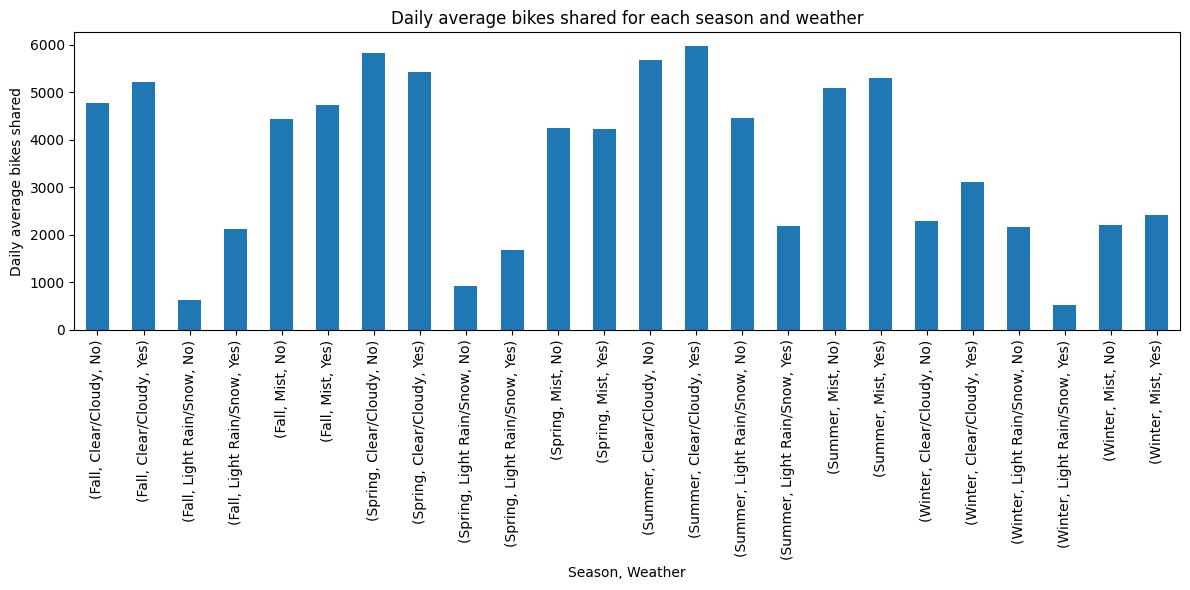

In [369]:
plt.figure(figsize=(12, 6))

# Plot as a grouped bar chart
avg_per_season_and_weather.plot(kind='bar', stacked=False)

# Adding titles and labels
plt.title('Daily average bikes shared for each season and weather')
plt.xlabel('Season, Weather')
plt.ylabel('Daily average bikes shared')

# Display the plot
plt.tight_layout()  # Adjusts layout for better fit
plt.show()

**Insight:**
- People prefer to rent a bike on a non rainy/snowy day

### Daily average temperatures for each season and weather

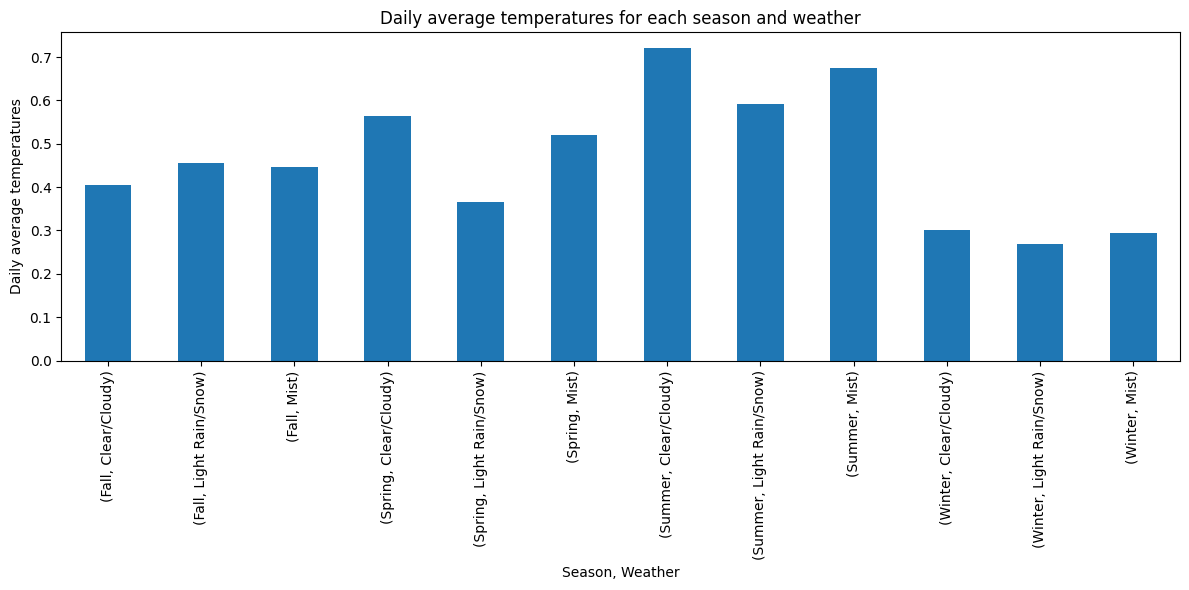

In [370]:
plt.figure(figsize=(12, 6))

# Plot as a grouped bar chart
temp_avg_per_season_and_weather.plot(kind='bar', stacked=False)

# Adding titles and labels
plt.title('Daily average temperatures for each season and weather')
plt.xlabel('Season, Weather')
plt.ylabel('Daily average temperatures')

# Display the plot
plt.tight_layout()  # Adjusts layout for better fit
plt.show()

### Pertanyaan 2:

**Insight:**
- xxx
- xxx

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2